<a href="https://colab.research.google.com/github/Snupix031/Vid/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [48]:
img=cv2.imread("4.jpg",0)


In [9]:
print(img.shape)

(950, 950)


In [10]:
gauss_noise=np.zeros((950,950),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [11]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

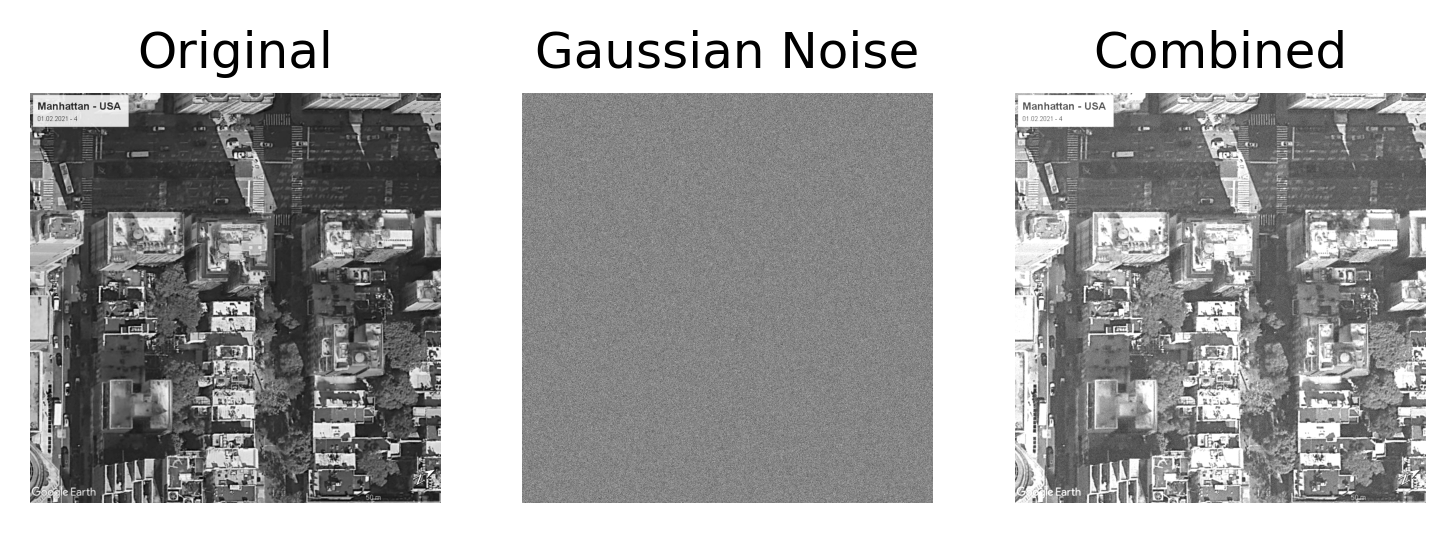

In [12]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [13]:
imp_noise=np.zeros((950,950),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]


In [14]:
in_img=cv2.add(img,imp_noise)

Text(0.5, 1.0, 'Combined')

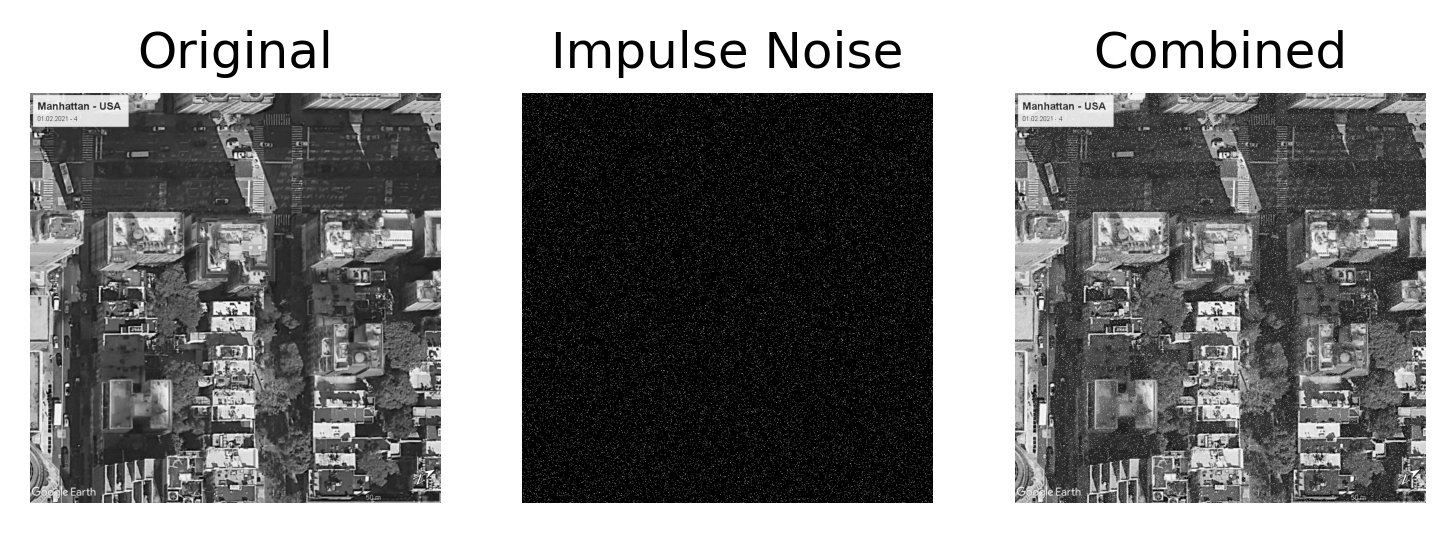

In [15]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [16]:
blurred1=cv2.medianBlur(gn_img,3)

blurred3=cv2.medianBlur(in_img,3)

Text(0.5, 1.0, 'Median Filter')

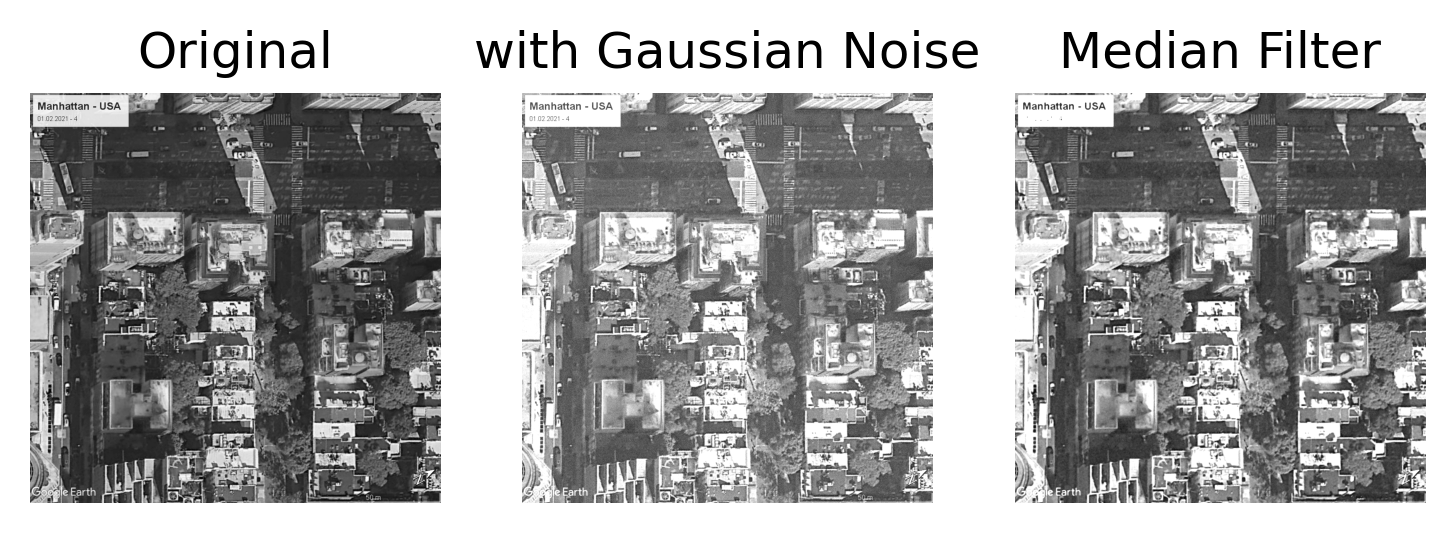

In [17]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred1,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Text(0.5, 1.0, 'Median Filter')

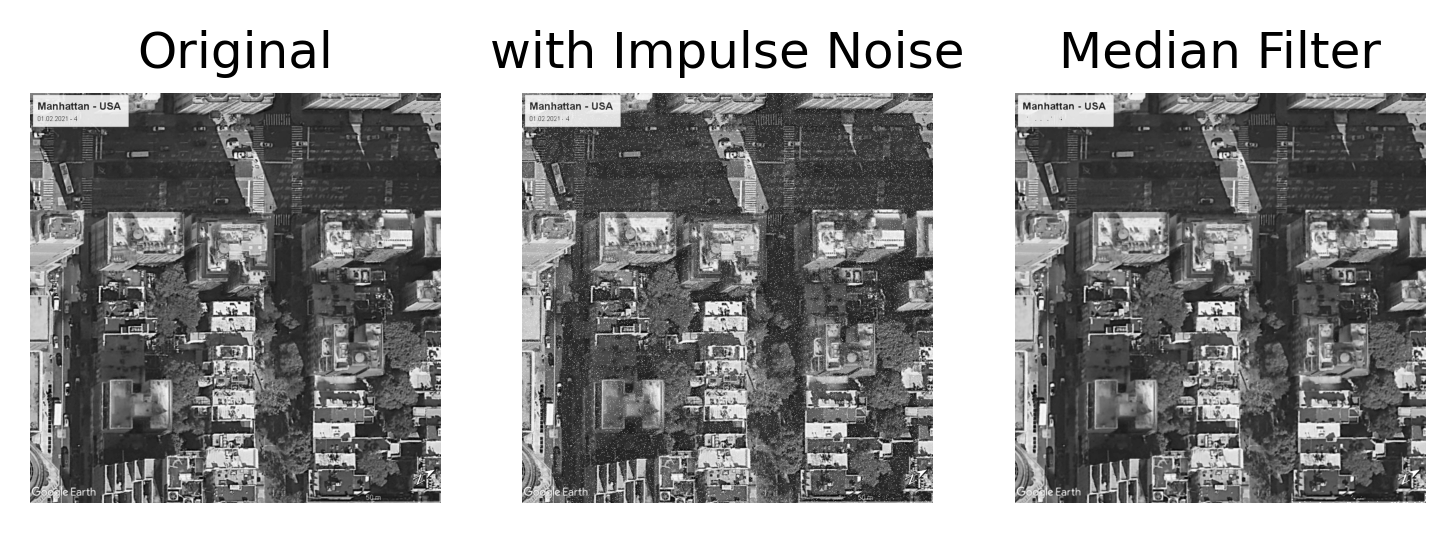

In [18]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred3,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

In [19]:
blurred21=cv2.GaussianBlur(gn_img,(3,3),0)

blurred23=cv2.GaussianBlur(in_img,(3,3),0)

Text(0.5, 1.0, 'Gaussian Filter')

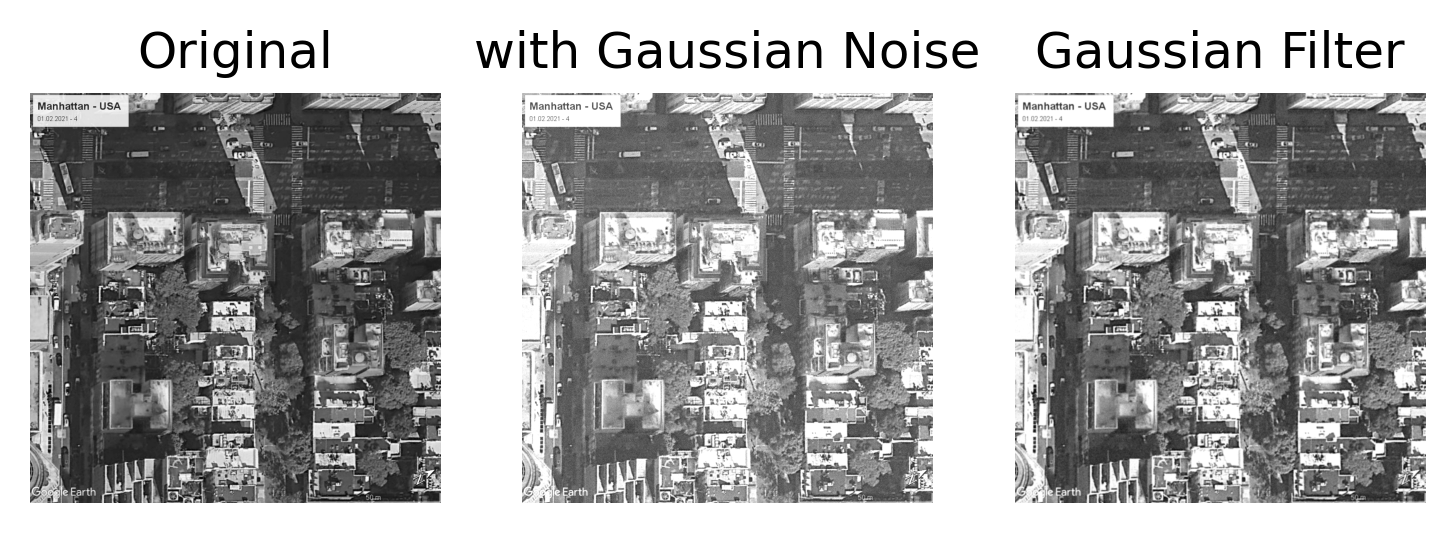

In [20]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred21,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Text(0.5, 1.0, 'Gaussian Filter')

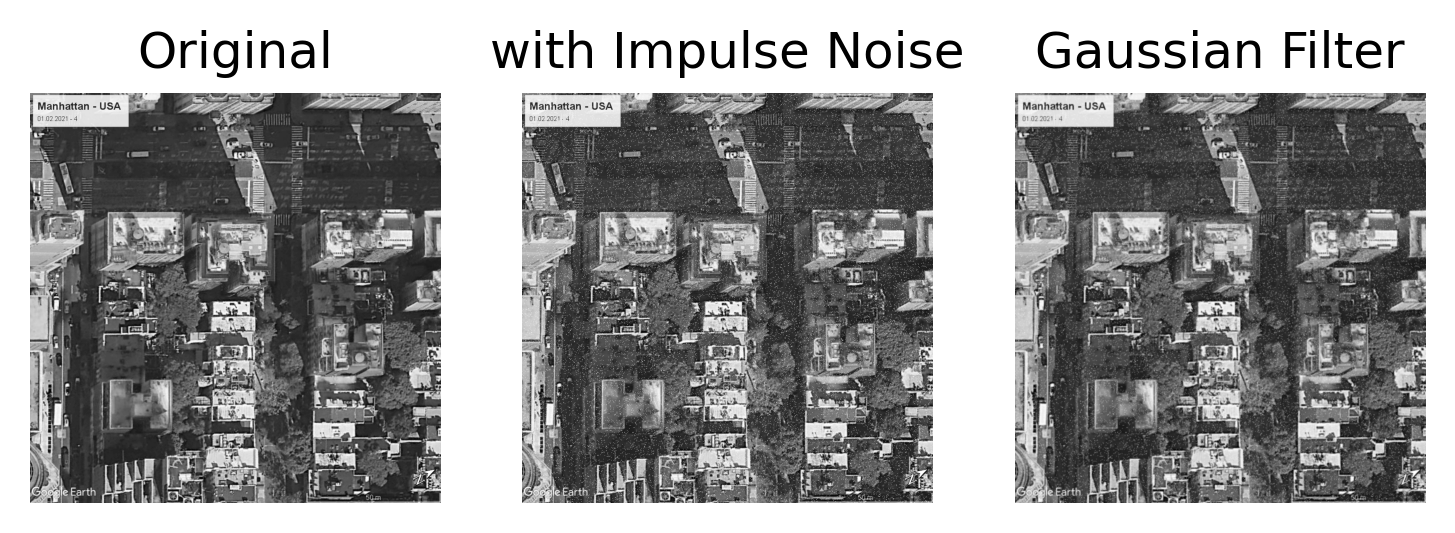

In [21]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred23,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

In [30]:
## NSR 
import numpy as np

image = np.array(img) ## input orignal image
mean_image = np.mean(image)

noisy_image = np.array(blurred23) ## input noisy image
noise = noisy_image - image
mean_noise = np.mean(noise)
noise_diff = noise - mean_noise
var_noise = np.sum(np.mean(noise_diff**2)) ## variance of noise

if var_noise == 0:
      snr = 100 ## clean image
else:
      snr = (np.log10(mean_image/var_noise))*20 ## SNR of the image
      
snr

-41.80789643717745